In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import os.path
import json

In [2]:
df = pd.read_csv('cleaninsurance_testdata.csv')
df

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1,Response
0,681,1,26,0.487179,2,3,1,0.223881,0.636364,0.163180,...,0,0,0,0,0,0,0,1,0,8
1,1747,1,26,0.589744,2,3,1,0.552239,0.636364,0.278243,...,0,0,0,0,0,0,1,0,0,6
2,1754,1,26,0.076923,2,3,1,0.089552,0.763636,0.288703,...,0,0,0,0,0,0,0,1,0,1
3,2131,2,26,0.692308,2,3,1,0.164179,0.836364,0.372385,...,0,0,0,0,0,0,1,0,0,6
4,2391,1,26,0.230769,2,3,1,0.477612,0.654545,0.209205,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,78099,1,26,0.487179,2,3,1,0.104478,0.690909,0.282427,...,0,0,0,0,0,0,0,0,0,1
59377,78513,1,26,0.230769,2,3,1,0.164179,0.600000,0.184100,...,0,0,0,0,0,0,0,1,0,8
59378,78703,1,26,0.743590,2,3,1,0.179104,0.763636,0.382845,...,0,0,0,0,0,0,1,0,0,6
59379,78765,1,26,0.076923,2,1,1,0.089552,0.636364,0.188285,...,0,0,0,0,0,0,0,0,0,8


In [3]:
y = df.Response
x = df.drop(columns = ['Response'])

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
clf = GaussianNB()

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
print ('\n',CV_rfc.best_estimator_)


 GaussianNB()


In [6]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB()

In [7]:
y_pred = clf.predict(x_test)

In [8]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy:  38.17863397548161


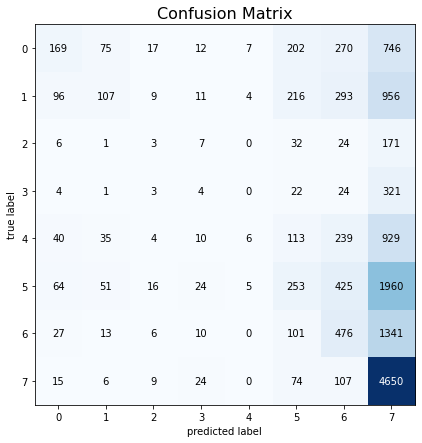

In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(7, 7))
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# Pickle

In [10]:
import pickle
# create an iterator object with write permission - model.pkl
with open('naivebayes_pkl.sav', 'wb') as files:
    pickle.dump(clf, files)

In [11]:
# load saved model
with open('naivebayes_pkl.sav' , 'rb') as f:
    lr = pickle.load(f)

In [12]:
# check prediction
lr.predict(x_test)

array([2, 6, 2, ..., 8, 8, 8], dtype=int64)

In [13]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test, lr.predict(x_test))*100)

Accuracy:  38.17863397548161
